# Part 2 - Régularisation de problèmes mal posés

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Préambule

### Un problème mal posé ?

Qu'est-ce-qu'un problème mal posé ? Pour commencer, nous allons définir qu'est ce qu'un problème bien posé. Un problème ($P$) bien posé dit respecter les 3 conditions suivantes:
* Une solution au problème $P$ existe
* La solution est unique
* La solution dépend continuellement de la donnée

Un problème mal posé est un problème ($P$) qui ne respecte pas une des conditions situées au dessus. Il est donc difficile de trouver une solution aux problèmes mal posés avec les méthodes vues auparavant. Pour trouver une solution optimale à ce type de problème nous allons utiliser la méthode analytique des moindres carrés.
Nous utiliserons aussi les méthodes de régularisation telles que LASSO ou Tikhonov.

## Question 2.9
---

### Principe

#### Principe - cas général

Le but de la résolution de la méthode analytique des moindres de carrés est de pouvoir trouver une solution permettant de trouver une relation entre des groupes différents en ajoutant de l'information dans ces données.[BV04]

Plus en détails, on recherche le vecteur $y \in \mathbb{R}^N$ qui contient les éléments {$y_1, y_2, ..., y_n$} où $y_i \in R$. Le vecteur $y$ résulte d'une corrélation des données de la matrice $X$ qui est une matrice $N \times P$ où $P$ représente le nombre de paramètres des éléments $x$. Nous allons en déduire $y$ à l'aide de la formule suivante:
$$
y = X\beta + \epsilon
$$

où
* $\beta$ est vecteur de paramètre qui rajoute l'information dans les données X.
* $\epsilon$ qui représente les résidus (différence entre le point et la droite $y$) aussi appeler erreur de prédiction.

On peut calculer la SSE (Sum of Squared Errors) qui représente la somme de tous les résidus.

$$
SSE(\beta) = \sum_{i}^{N}((y_i - x_i^T\beta)^2)\\
SSE(\beta) = (y - X\beta)^T(y - X\beta)\\
SSE(\beta) = ||y - X\beta||^2_2
$$

La $SSE$ va nous permettre d'appliquer des pénalités à nos données afin de trouver la solution optimale à notre problème.

#### Exemple avec la régression linéaire à 2 dimensions

Soit deux ensembles $E_1$ et $E_2$ de taille $n$ où $\{x_1, x_2, ..., x_n\}$ et $\{y_1, y_2, ... , y_n\}$. $E_1$ et $E_2$ représente des points dans un domaine à 2 dimensions.

on souhaite construire une droite qui séparerait au mieux les deux ensembles $E_1$ et $E_2$.

La méthode des moindres carrés nous permet d'obtenir une droite d'équation du type $y = ax + b$.

Comme montrer au dessus, nous allons calculer la SSE de nos points. La SSE va nous permettre de retrouver les coefficients $a$ et $b$ ppur notre droite objectif $y$.
Ci-dessous la SSE:

$$
SSE = \sum_{i = 0}^{n}{(y_i - (ax_i + b))^2}
$$

Afin d'obtenir la droite pour séparer nos éléments, il faut trouver les valeurs de $a$ et de $b$ à l'aide de la formule de la $SSE$.

#### Démonstration

**Cherchons b**

On a $$SCE = \sum_{i = 0}^{n}{(y_i - (ax_i + b))^2} = \sum_{i = 0}^{n}{(-ax_i - b + y_i)^2}$$

Nous calculons la dérivée partielle en fonction de $b$. Nous considérons $a$ comme une constante

$$
\frac{\partial{SSE}}{\partial{b}} = 0 \iff -2 \sum_{i = 0}^{n}{(-ax_i - b + y_i)} = 0
$$

Nous séparons les deux termes de la somme:

$$
\iff \sum_{i = 0}^{n}{(-ax_i - b)} + \sum_{i = 0}^{n}{y_i} = 0\\
\iff \sum_{i = 0}^{n}{(-ax_i)} - \sum_{i = 0}^{n}{b} + \sum_{i = 0}^{n}{y_i} = 0\\
\iff \sum_{i = 0}^{n}{(-ax_i)} - nb + \sum_{i = 0}^{n}{y_i} = 0\\
\iff -nb = a\sum_{i=0}^{n}{x_i} - \sum_{i = 0}^{n}{y_i}\\
\iff b = -a\frac{\sum{x_i}}{n} + \frac{\sum{y_i}}{n}
$$

On sait que $\frac{\sum{x_i}}{n}$ équivaut à la moyenne de x donc $\frac{\sum{x_i}}{n} = \overline{x}$. De même pour $\frac{\sum{y_i}}{n} = \overline{y}$. Donc:

$$
b = -a\overline{x} + \overline{y}
$$

**Cherchons a**

Avant de calculer la dérivée partielle de $SSE$ en fonction de $a$, nous allons remplacer $b$ dans l'expression de $SSE$

$$
SSE = \sum_{i = 0}^{n}{(-ax_i + a\overline{x} - \overline{y} + y_i)^2}\\
SSE = \sum_{i = 0}^{n}{(-a(x_i - \overline{x}) + (y_i - \overline{y}))^2}
$$

On reconnaît une identité remarquable du type $(a-b)^2 = a^2 - 2ab + b^2$

$$
SSE = \sum_{i=0}^{n}({a^2(x_i - \overline{x})^2}) + 2\sum_{i=0}^{n}({-a(x_i - \overline{x})(y_i - \overline{y})}) + \sum_{i=0}^{n}(y_i - \overline{y})^2
$$

On résout la dérivée partielle de la $SCE$ en fonction de $a$ telle que $\frac{\partial{SCE}}{\partial{a}} = 0$

$$
\iff \sum_{i=0}^{n}({2a(x_i - \overline{x})^2}) - 2 \sum_{i=0}^{n}({(x_i - \overline{x})(y_i - \overline{y})})\\
\iff a = \frac{2\sum_{i=0}^{n}({(x_i - \overline{x})(y_i - \overline{y})}}{2\sum_{i=0}^{n}({(x_i - \overline{x})^2})}\\
$$

Or $\sum_{i=0}^{n}({(x_i - \overline{x})(y_i - \overline{y})} = \sigma_{xy}$ et $\sum_{i=0}^{n}({(x_i - \overline{x})} = \sigma_x$ donc

$$
a = \frac{\sigma_{xy}}{\sigma_{x}^2}
$$

## Question 2.10
---

### Préambule

Comme vu à la question 2.9, la méthode des moindres carrés permet de trouver une corrélation entre des ensembles différents. Nous avons vu la notion de $SSE$ comme étant la somme des résidus. Afin de pouvoir trouver la séparation optimale, il faut trouver un moyen de minimiser la $SSE$. Nous allons utiliser des méthodes de régularisation et de pénalité que nous allons appliquer sur la $SSE$. Au cours de cette question, nous allons présenter les méthodes de régularisation Tikhonov et de LASSO.

On rappelle la $SSE$:

$$
SSE(\beta) = ||y - X\beta||^2_2
$$

où
* $\beta$ est notre ensemble
* $y$ notre fonction objective
* $X$ les points

On définit une pénalité dans le domaine du machine learning (ML) par la minisation de la formule suivante:

$$
arg min \ Pen(\beta) = \mathcal{L}(\beta) + \lambda \Omega(x)
$$

où
* $\mathcal{L}(\beta)$ est la fonction de regression (fonction perte en ML)
* $\lambda$ est le paramètre de régularisation
* $\Omega(\beta)$ est la fonction de pénalité

Les deux méthodes présentent en dessous utilisent deux fonctions de pénalité différentes avec laquelle nous pourrons trouver le vecteur $\beta$ le plus optimal possible à notre problème.

### Les méthodes
#### Tikhonov

Tikhonov (de son vrai non Andreï Nikolaïevitch Tikhonov) est un mathématicien russe. Il est connu pour avoir prouvé la régularisation qui porte son nom. Le but de cette régularisation est d'appliquer une régularisation $\mathcal{L}_2$ comme fonction de pénalité. Cette régularisation s'appelle aussi Ridge[TiK43].

$$
Ridge(\beta) = ||y-X\beta||^{2}_{2} - \lambda ||\beta||^2_2
$$

Afin de pouvoir trouver le $\beta$ minimal, il suffit de résoudre:

$$
\frac{\partial{Ridge}}{\partial{\beta}} = 0
$$

Ce qui nous donne:

$$
\iff\frac{\partial{}}{\partial{\beta}} ((y - X\beta)^T(y - X\beta) + \lambda\beta^T\beta) = 0\\
\iff\frac{\partial{}}{\partial{\beta}} (y^Ty - 2\beta^TX^Ty + \beta^TX^X\beta + \lambda\beta^T\beta) = 0\\
\iff -2X^Ty + 2X^TX\beta + 2\lambda\beta = 0\\
\iff -X^Ty + (X^TX + \lambda)\beta = 0\\
\iff \beta = \frac{X^Ty}{X^TX + \lambda}
$$

#### LASSO

La méthode régularisation de LASSO permet d'appliquer une pénalité $||\beta||_1$ à la méthode de régularisation ce qui donne:


$$
LASSO(\beta) =||y-X\beta||^{2}_{2} + \lambda||\beta||_1
$$

La fonction de pénalité est une régularisation $\mathcal{L}_1$[Tib96].

L'avantage d'utiliser la régularisation de LASSO est de l'utiliser dans le cas où $N < P$. La régularisation $\mathcal{L}_1$ s'adapte mieux que la régularisation $\mathcal{L}_2$ sur ce type de données. Hors il n'est pas adapté dans le cadre de fortes corrélations entre les variables ou si $P$ est très grand par rapport à $n$.

Nous pouvons faire utiliser les deux régularisation en même temps en utilisant Elsatic NET[Hui03].

## Réferences des questions 2.9 et 2.10
---

[^BV04] **Convex Optimization.**
        Stephen Boyd and Lieven Vandenberghe.
        *Cambridge University Press, New York, NY, USA* 2004.

[^TiK43] **On the stability of inverse problems**
    A. N. Tikhonov
    *Doklady Akademii Nauk SSSR* vol. 39, no. 5, pp. 195–198, 1943.

[^Tib96] **Regression shrinkage and selectionvia the lasso.**
        R. Tibshirani.
        *Journal ofthe Royal Statistical Society* Series B, 58(1):267–288, 1996.
        
[^Hui03] **Regularization and Variable Selection via theElastic Net**
    Hui Zou and Trevor Hastie
    *Department of Statistics, Stanford University*, 2003

## Question 2.11
---

ci-dessous la classe qui permet d'utiliser la méthode des moindres carrées

In [2]:
class least_square:
    def __init__(self, X):
        self.X = X
        self.beta = np.zeros(X.shape[1])
        self.eps = np.random.randn(X.shape[0])
        
    def run(self):
        self.y = self.X.dot(self.beta) + self.eps 
        for i in range(self.y.shape[0]):
            r = (self.y[i] - self.beta.dot(self.X[i,:]))
            self.eps[i] = r**2
        return self.y
    
    def error(self):
        somme = 0
        for i in range(self.y.shape[0]):
            r = (self.y[i] - self.beta.dot(self.X[i,:]))
            self.eps[i] = r
            somme += r**2
        print("sum: %f" % (somme))
        self.y = self.X.dot(self.beta) + self.eps
        return self.y
        
    def compute_SSE(self):
        return np.linalg.norm(self.y - self.X.dot(self.beta), ord=2)**2

    def tikhonov_reg(self, alpha):
        self.beta = np.linalg.inv(np.transpose(self.X).dot(self.X) + np.identity(self.X.shape[1]) * alpha).dot(np.transpose(self.X).dot(self.y))
        self.y = self.X.dot(self.beta) + self.eps
        return self.y


before: 8.88219239721786
after: 36.236214
after: 36.236214


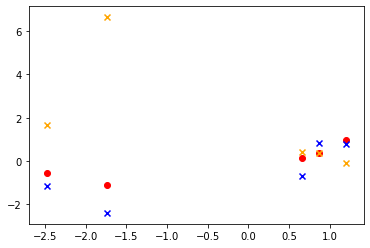

In [3]:
n_features = 2
n_features_info = 2
n_samples = 5

X = np.random.randn(n_samples, n_features)

l = least_square(X)
Y = l.run()

print("before: %s" % l.compute_SSE())

# Plot
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X[:,0], X[:,1],c='r', marker='o')

ax.scatter(X[:,0], Y,c='b', marker='x')

#print(l.compute_SSE())

after_reg = l.tikhonov_reg(0.1)
print("after: %f" % l.compute_SSE())

after_reg = l.tikhonov_reg(0.1)
print("after: %f" % l.compute_SSE())

ax.scatter(X[:,0], after_reg,c='orange', marker='x')